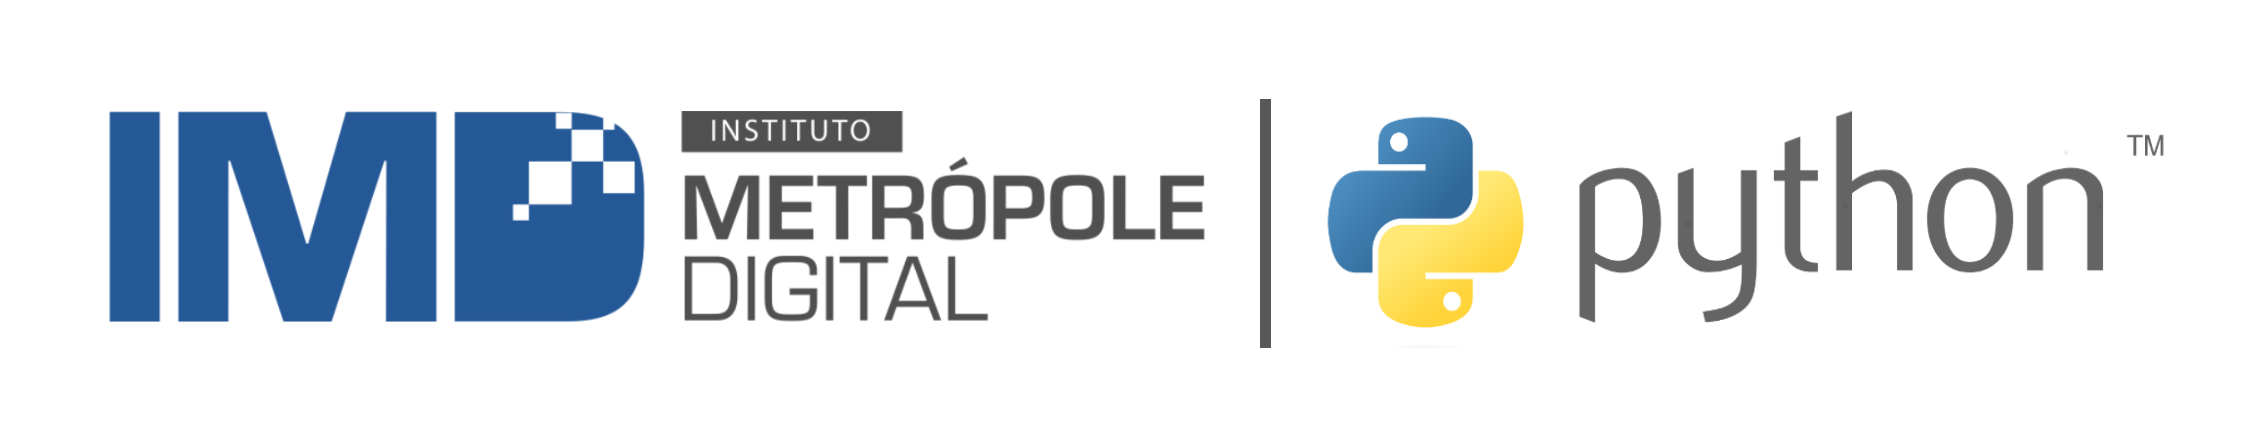

#**Python para Visualização e Análise de Dados**

---


**Professor:** Carlos Artur Guimarães | **Integrante:** José Manoel Freitas da Silva

# **1) Problemática**


  > ### Como efeito colateral da globalização originária das revoluções industriais, a utilização massiva de combustiveis fósseis para produção de energia se tornou comum nos centros industriais e urbanos. Apesar de fornecerem o combustível necessário para formentar a industria, as práticas desta época trouxeram e ainda trazem malefícios para a saúde dos indivíduos e para o meio ambiente, que sofre com a retirada desenfreada de material e o depósito contínuo de poluentes.


> ### Deste modo, a busca por um meio de produção de energia renovável e sustentável se tornou um dos temas principais das pesquisas cientificas, que visam produzir equipamentos capazes de gerar energia em grande volume sem danificar o ecosistema e a manutenção do meio ambiente, utilizando de fontes como a luz solar, correntes de ar e até mesmo a força maremotriz para alimentar usinas elétricas.


> ### Com o intuito de mostrar o avanço tecnológico do Brasil em relação a utilização de fontes de energia sustentável, este projeto utiliza os dados fornecidos pela ANEEL (Agência Nacional de Energia Elétrica) e hospedados no Github para analisar o resultado de leilões de produção de energia no Brasil, no período de 2005 a 2019, utilizando como fundamentação o objetivo n° 7 da Agenda ONU 2030, que visa assegurar o acesso a energia limpa e acessível para todos.


---

> #### Para a confecção deste projeto foi utilizada a biblioteca Pandas para visualização e tratamento do dataframe, a biblioeca missigno para busca de dados faltosos e a biblioteca Plotly para plotagem de gráficos.


  

#**2) Fonte dos dados**

1.  https://www.aneel.gov.br/publicacoes 

  * dados de leilões referentes aos anos de 2005 a 2019.


#**3) Importação dos dados**

In [ ]:
# Importando a biblioteca Pandas para visualização e análise do dataframe
import pandas as pd

# Importando dataset hospedado no github para a variável df_aneel
df_aneel = pd.read_csv("https://raw.githubusercontent.com/JosManoel/ANEEL_Dataset_2005-2019/main/Dataset/ANEEL_Dataset.csv")

# Exibindo dataframe
df_aneel

,tipo,usina,tipo_de_leilao,leilao,pot_MW,garantia_fisica_MW_medio,lotes_vendidos,preco_por_MW,localizacao,fonte,mod,invest_previsto,empresa_consorcio
0,UHE,UHE Foz do Rio Claro,A-5,Leilão 2/2005,68.4,41,41,108.04,Caçú e São Simão/GO,Água,PIE,281032620.00,Alusa Engenharia Ltda
1,UHE,UHE São José,A-5,Leilão 2/2005,51,30.4,30,115.80,Salvador das Missões e Rolador / RS,Água,PIE,208985970.00,Alusa Engenharia Ltda
2,UHE,UHE Passo São João,A-5,Leilão 2/2005,77,39,37,112.55,Dezesseis de Novembro e Roque Gonzales / RS,Água,PIE,267595880.00,Eletrosul S.A.
3,UHE,UHE Simplício,A-5,Leilão 2/2005,337.7,191.3,185,115.38,Sapucaia e Três Rios/RJ e Chiador e Além Paraí...,Água,PIE,1441505800.00,Furnas\r\nCentrais Elétricas S.A.
4,UHE,UHE Retiro Baixo,A-5,Leilão 2/2005,82,38.5,36,114.86,Curvelo e Pompeu/MG,Água,PIE,262417880.00,Orteng Equipamentos e Sistemas Ltda.
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1306,EOL,VENTOS DE SÃO JANUÁRIO 16,A-6,Leilão 04/2019,8.4,4,12,98.98,BA,VENTO,PIE,33600000.00,VENTOS DE SÃO JANUÁRIO ENERGIAS RENOVÁVEIS S.A.
1307,EOL,VENTOS DE SÃO JANUÁRIO 17,A-6,Leilão 04/2019,8.4,4.1,13,98.99,BA,VENTO,PIE,33600000.00,VENTOS DE SÃO JANUÁRIO ENERGIAS RENOVÁVEIS S.A.
1308,EOL,VENTOS DE SÃO JANUÁRIO 18,A-6,Leilão 04/2019,8.4,4,12,99.00,BA,VENTO,PIE,33600000.00,VENTOS DE SÃO JANUÁRIO ENERGIAS RENOVÁVEIS S.A.
1309,EOL,VENTOS DE SÃO JANUÁRIO 19,A-6,Leilão 04/2019,8.4,4,12,98.99,BA,VENTO,PIE,33600000.00,VENTOS DE SÃO JANUÁRIO ENERGIAS RENOVÁVEIS S.A.


#**4) Limpeza dos dados**

* Devido à falta de normatização dos dados, para facilitar a visualização dos atributos, datas e localizações se tornou necessário um rearranjo do conteúdo das colunas de "localizacao", "leilao", "invest_previsto" e "tipo".

### Reestruturando dataframe

In [ ]:
# Criando a coluna "UF" a partir da coluna "localição" para exibir os estados
df_aneel['UF'] = df_aneel.localizacao.str[-3:]

# Substituindo todos os caracteres especiais da coluna "UF" por um caractere vazio
df_aneel.UF = df_aneel.UF.str.replace('\W', '')

# Removendo coluna de localização
df_aneel = df_aneel.drop(columns=['localizacao']) 


# criando coluna nomenclatura
df_aneel['nomenclatura'] = df_aneel.tipo

# Substituindo as siglas por nomes comumente utilizados para denominar essas tecnologias no mercado
df_aneel.nomenclatura = df_aneel.nomenclatura.str.replace('EOL', 'Usina Eólica')
df_aneel.nomenclatura = df_aneel.nomenclatura.str.replace('UEE', 'Usina Eólica')

df_aneel.nomenclatura = df_aneel.nomenclatura.str.replace('UFV', 'Usina Fotovoltaica')
df_aneel.nomenclatura = df_aneel.nomenclatura.str.replace('UES', 'Usina Fotovoltaica')

df_aneel.nomenclatura = df_aneel.nomenclatura.str.replace('PCH', 'Usina Hidroelétrica')
df_aneel.nomenclatura = df_aneel.nomenclatura.str.replace('UHE', 'Usina Hidroelétrica')
df_aneel.nomenclatura = df_aneel.nomenclatura.str.replace('CGH', 'Usina Hidroelétrica')

df_aneel.nomenclatura = df_aneel.nomenclatura.str.replace('UTE', 'Usina Termoelétrica')


# Criando a coluna "ANO" a partir da coluna "leilao"
df_aneel['ANO'] = df_aneel.leilao.str[-4:]


#Normatizando dados numericos da coluna invest_previsto para que possam ser tratados como numeros
df_aneel.invest_previsto = df_aneel.invest_previsto.str.replace(',', '.')


# Exibindo dataframe
df_aneel.head()

,tipo,usina,tipo_de_leilao,leilao,pot_MW,garantia_fisica_MW_medio,lotes_vendidos,preco_por_MW,fonte,mod,invest_previsto,empresa_consorcio,UF,nomenclatura,ANO
0,UHE,UHE Foz do Rio Claro,A-5,Leilão 2/2005,68.4,41,41,108.04,Água,PIE,281032620.00,Alusa Engenharia Ltda,GO,Usina Hidroelétrica,2005
1,UHE,UHE São José,A-5,Leilão 2/2005,51,30.4,30,115.80,Água,PIE,208985970.00,Alusa Engenharia Ltda,RS,Usina Hidroelétrica,2005
2,UHE,UHE Passo São João,A-5,Leilão 2/2005,77,39,37,112.55,Água,PIE,267595880.00,Eletrosul S.A.,RS,Usina Hidroelétrica,2005
3,UHE,UHE Simplício,A-5,Leilão 2/2005,337.7,191.3,185,115.38,Água,PIE,1441505800.00,Furnas\r\nCentrais Elétricas S.A.,MG,Usina Hidroelétrica,2005
4,UHE,UHE Retiro Baixo,A-5,Leilão 2/2005,82,38.5,36,114.86,Água,PIE,262417880.00,Orteng Equipamentos e Sistemas Ltda.,MG,Usina Hidroelétrica,2005


### Analizando consistência dos dados

In [ ]:
# Instalação da biblioteca missigno, utilizada para busca de dados ausentes

In [ ]:
pip install missingno

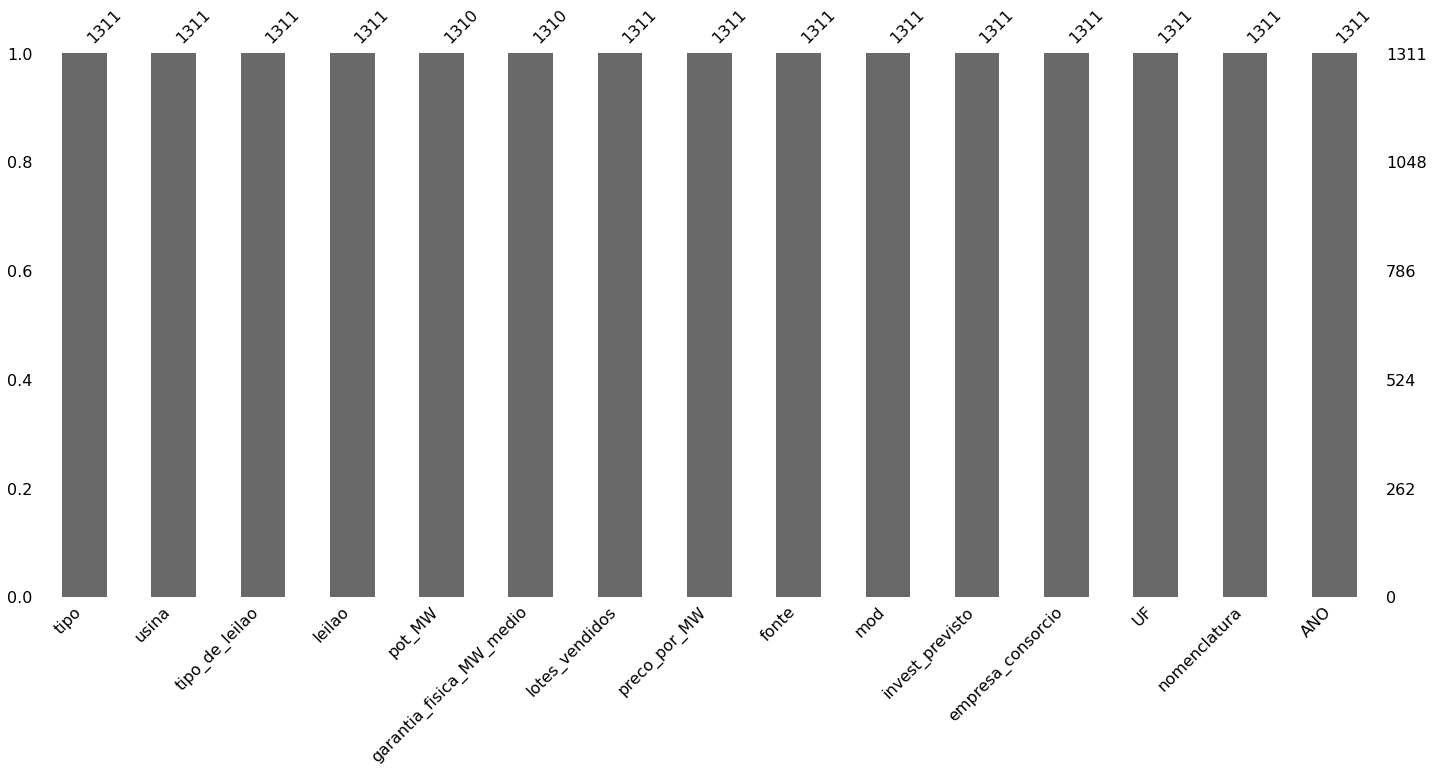

In [ ]:
# Importando biblioteca do missingno
import missingno as msno 

# Realizando a leitura de dados faltosos com o missingo
msno.bar (df_aneel)

> Por apresentar boa consistência de dados e possuir apenas 2 dados faltantes, o dataframe utilizado se qualifica como usual para o próposito deste projeto.

#**5) Vizualização dos dados**

In [ ]:
# Importando a biblioteca Plotly para visualização gráfica de dados
import plotly.offline as py
import plotly.graph_objs as go

###Analizando os investimentos em energia no Brasil no periodo de 2005 a 2019

In [ ]:
#agrupando valores de acordo com a coluna 'nomenclatura'
df = df_aneel.groupby('nomenclatura').count()

# Criando objeto gráfico para atribuir a porcentagem de utilização de cada tecnologia
data = [go.Pie(labels= df.index,
               values= df.usina,
               textinfo='label+percent',
               textfont ={'family': 'Arial','size': 16},
               pull=[0.1, 0.1, 0.1, 0.1])]

#Construindo Layout do gráfico 
layout = go.Layout(title = '<b>Participação das tecnologias de produção de energia no Brasil - 2005 a 2019</b>',
                   titlefont = {'family': 'Arial','size': 24},
                   title_x= 0.5,
                   template='none')

# Atribuindo data e layout ao objeto fig
fig = go.Figure(data= data, layout= layout)


# Plantando o gráfico com o objeto fig
py.iplot(fig)


> Podemos observar com este gráfico que boa parte dos investimentos no Brasil no período de 2005 a 2019 foram destinados a construção de usinas eólicas, tomando 58% dos investimentos totais em energia do país, promovendo um aumento significativo na utilização de fontes de produção de energia limpa no Brasil. Além disto, também temos as usinas fotovoltaicas, com 11,4% dos investimentos.


###Analizando o desenvolvimento de usinas de energia elétrica em cada estado.

In [ ]:
# Criando objeto gráfico para atribuir as taxas de ocorrência de Usinas Fotovoltaicas de acordo com o estado
gf_solar = go.Bar(x = df_aneel.UF, y = df_aneel.nomenclatura == 'Usina Fotovoltaica',
               name = 'Usina Fotovoltaica', marker = {'color': '#d62728'})

# Criando objeto gráfico para atribuir as taxas de ocorrência de Usinas Eólicas de acordo com o estado
gf_eolica = go.Bar(x = df_aneel.UF, y = df_aneel.nomenclatura == 'Usina Eólica',
                name = 'Usina Eólica', marker = {'color': '#1f77b4'})

# Criando objeto gráfico para atribuir as taxas de ocorrência de Usinas Hidroelétricas de acordo com o estado
gf_hidro = go.Bar(x = df_aneel.UF, y = df_aneel.nomenclatura == 'Usina Hidroelétrica',
                name = 'Usina Hidroelétrica', marker = {'color': '#2ca02c'})

# Criando objeto gráfico para atribuir as taxas de ocorrência de Usinas Termoelétricas de acordo com o estado
gf_termo = go.Bar(x = df_aneel.UF, y = df_aneel.nomenclatura == 'Usina Termoelétrica',
                name = 'Usina Termoelétrica', marker = {'color': '#ff7f0e'})

# Mesclando objetos gráficos
data = [gf_solar, gf_eolica, gf_hidro, gf_termo]


# Construindo Layout do gráfico 
layout = go.Layout(title = '<b>Participação das tecnologias de produção de energia em cada estado - 2005 a 2019</b>',
                   titlefont = {'family': 'Arial','size': 24},
                   title_x=0.5,
                   xaxis = {'title': '<b>Estados</b>'},
                   yaxis = {'title': '<b>Ocorrencia</b>'},
                   barmode = 'stack',
                   hovermode = False,
                   template='gridon')


# Atribuindo data e layout ao objeto fig
fig = go.Figure(data= data, layout= layout)

# Removendo o eixo y
fig.update_yaxes(showticklabels=False)


# Plantando o gráfico com o objeto fig
py.iplot(fig)

> Com base neste gráfico, se torna evidente que a maior parte dos investimentos no setor de produção de energia eólica, que possui maior participação no mercado, está na região nordeste do Brasil, salvo apenas o estado do Rio Grande do Sul. Este cenário acontece devido as condições favoráveis presentes nesta região situada próximo a linha do Equador, onde as temperaturas tendem a ser maiores e provocam maiores movimentações de massas de ar. Além disto, neste mesmo setor também possuímos a presença de usinas fotovoltaicas, presentes em maior volume no estado da Bahia.

###Analizando o desenvolvimento das tecnologias de energia sustentável no decorrer do período da pesquisa.

In [ ]:
# Criando objeto gráfico para atribuir as taxas de ocorrência de Usinas Fotovoltaicas de acordo com o ano
gf_solar = go.Bar(x = df_aneel.ANO, y = df_aneel.nomenclatura == 'Usina Fotovoltaica',
               name = 'Usina Fotovoltaica', marker = {'color': '#d62728'})

# Criando objeto gráfico para atribuir as taxas de ocorrência de Usinas Eólicas de acordo com o ano
gf_eolica = go.Bar(x = df_aneel.ANO, y = df_aneel.nomenclatura == 'Usina Eólica',
                name = 'Usina Eólica', marker = {'color': '#1f77b4'})

# Criando objeto gráfico para atribuir as taxas de ocorrência de Usinas Hidroelétricas de acordo com o ano
gf_hidro = go.Bar(x = df_aneel.ANO, y = df_aneel.nomenclatura == 'Usina Hidroelétrica',
                name = 'Usina Hidroelétrica', marker = {'color': '#2ca02c'})

# Criando objeto gráfico para atribuir as taxas de ocorrência de Usinas Termoelétricas de acordo com o ano
gf_termo = go.Bar(x = df_aneel.ANO, y = df_aneel.nomenclatura == 'Usina Termoelétrica',
                name = 'Usina Termoelétrica', marker = {'color': '#ff7f0e'})

# Mesclando objetos gráficos
data = [gf_solar, gf_eolica, gf_hidro, gf_termo]


# Construindo Layout do gráfico 
layout = go.Layout(title = '<b>Ocorrência do surgimento de usinas produtoras de energia elétrica</b>',
                   titlefont = {'family': 'Arial','size': 24},
                   title_x= 0.5,
                   xaxis = {'title': '<b>Período</b>'},
                   yaxis = {'title': '<b>Ocorrencia</b>'},
                   barmode = 'stack', 
                   template='gridon',
                   hovermode = False)

# Atribuindo data e layout ao objeto fig
fig = go.Figure(data= data, layout= layout)

# Removendo o eixo y
fig.update_yaxes(showticklabels=False)


# Plantando o gráfico com o objeto fig
py.iplot(fig)

> Como pode ser observado neste gráfico, o Brasil só passou a investir no cenário de energias renováveis a partir de 2009, tendo o auge com as aplicações em usinas eólicas no ano de 2013, após as Nações Unidas declararem o ano de 2012 como o Ano Internacional da Energia Sustentável para Todos. Porém a energia solar só passou a ser utilizada amplamente no Brasil por volta do ano de 2014.

>Com base nestas observações, iremos nos aprofundar no estudo do cenário brasileiro de energias renováveis através da análise de leilões de usinas eólicas e fotovoltaicas, já que apesar das hidroelétricas serem classificas como fontes de energia renovável, a construção dessas estações acabam por danificar severamente o ecossistema local, prejudicando o meio-ambiente. Além disso, também iremos descartar neste estudo as usinas termoelétricas, que produzem energia através da queima de combustíveis fósseis, liberando gases poluentes na atmosfera.

###Função de filtro desenvolvida para retornar dados para tabulação de gráficos




> Para auxiliar neste estudo foi desenvolvido uma função de filtro para análise dos investimentos denominado "filter_invest". Esta função utiliza dos parâmetros:


> * tec_renovavel: tecnologia que será utilizada para filtrar os dados;
> * df_filter: banco de dados que será filtrado;
> * UF: Estado que será analisado;
> * column: coluna que será retornada.


>Esta função possui como tarefa retornar uma série de dados com base no estado e na tecnologia analisada.


In [ ]:
# Função para pegar os dados de gastos com determinado tipo de energia
def filter_invest(tec_renovavel, df_filter, UF, column):

  # Verificando se os parametros tec_renovavel e df_filter são existentes
  if (tec_renovavel or df_filter) is None:
    print("ERROR: Os parametros tec_renovavel e df_filter não podem ser None\n" )
    return 


  # Selecionando as linhas que nao sao da tecnologia escolhida
  df_remove = df_filter.loc[df_filter.nomenclatura != tec_renovavel]

  # Deletando linhas que atendem a condicional da tabela df_del
  df_filter = df_filter.drop(df_remove.index)


  # Filtrando por estado 
  if UF is not None:
    # Selecionando as linhas que nao sao do estado escolhido
    df_uf = df_filter.loc[df_filter.UF != UF]

    # Deletando linhas que atendem a condicional da tabela df_del
    df_filter = df_filter.drop(df_uf.index)


  # Retornando tabela conforme coluna especificada no parametro column
  if column is None:
    return df_filter
    
  else:
    return df_filter[column]

###Analizando os investimentos com energia eolica e solar em cada estado

In [ ]:
# Criando objeto gráfico para atribuir as taxas de utilização de fontes de energia solar de acordo com o estado
gf_solar = go.Bar(x = filter_invest('Usina Fotovoltaica', df_aneel, None, 'UF'), y =  filter_invest('Usina Fotovoltaica', df_aneel, None, 'invest_previsto'),
               name = 'Usina Fotovoltaica', marker = {'color': '#d62728'})

# Criando objeto gráfico para atribuir as taxas de utilização de fontes de energia eólica de acordo com o estado
gf_eolica = go.Bar(x =filter_invest('Usina Eólica', df_aneel,None, 'UF'), y =  filter_invest('Usina Eólica', df_aneel,None, 'invest_previsto'),
                name = 'Usina Eólica', marker = {'color': '#1f77b4'})


# Mesclando objetos gráficos
data = [gf_solar, gf_eolica]

# Construindo Layout do gráfico 
layout = go.Layout(title = '<b>Investimentos em produção de energia eólica e solar por estado</b>',
                   titlefont = {'family': 'Arial','size': 24},
                   title_x= 0.5,
                   template='gridon',
                   barmode = 'stack', 
                   xaxis = {'title': '<b>Estados</b>'},
                   yaxis = {'title': '<b>Total investido</b>'},
                   hovermode = False)


# Atribuindo data e layout ao objeto fig
fig = go.Figure(data= data, layout= layout)

# Plantando o gráfico com o objeto fig
py.iplot(fig)

>Através destes dados podemos concluir que os estado da Bahia e do Rio Grande do Norte lideram os investimentos tecnológicos no setor de produção de energia sustentável por meio de usinas eólicas, porém no quesito da utilização da energia solar o estado do RN acaba perdendo o posto para o Piauí, que se equipara aos investimentos da Bahia. Deste modo, iremos nos aprofundar na visualização destes 3 estados para melhor entender suas posições no mercado.

###Investimentos ao decorrer do periodo estudado no estado da BA

In [ ]:
# Criando objeto gráfico para atribuir as taxas de produção de energia solar de acordo com o estado
gf_solar = go.Bar(x = filter_invest('Usina Fotovoltaica', df_aneel, 'BA','ANO'), y =  filter_invest('Usina Fotovoltaica', df_aneel, 'BA','invest_previsto'),
               name = 'Usina Fotovoltaica', marker = {'color': '#d62728'})

# Criando objeto gráfico para atribuir as taxas de produção de energia eólica de acordo com o estado
gf_eolica = go.Bar(x = filter_invest('Usina Eólica', df_aneel, 'BA','ANO'), y =  filter_invest('Usina Eólica', df_aneel, 'BA','invest_previsto'),
                name = 'Usina Eólica', marker = {'color': '#1f77b4'})


# Mesclando objetos gráficos
data = [gf_solar, gf_eolica]

#Construindo Layout do gráfico 
layout = go.Layout(title = '<b>Investimentos ao decorrer do periodo estudado no estado da BA </b>',
                   titlefont = {'family': 'Arial','size': 24},
                   title_x= 0.5,
                   template='gridon',
                   barmode = 'stack',                   
                   yaxis = {'title': '<b>Total investido</b>'},
                   xaxis = {'title': '<b>Período</b>'},
                   hovermode = False)


# Atribuindo data e layout ao objeto fig
fig = go.Figure(data= data, layout= layout)


# Plantando o gráfico com o objeto fig
py.iplot(fig)

###Investimentos ao decorrer do periodo estudado no estado do PI

In [ ]:
# Criando objeto gráfico para atribuir as taxas de produção de energia solar de acordo com o estado
gf_solar = go.Bar(x = filter_invest('Usina Fotovoltaica', df_aneel, 'PI','ANO'), y =  filter_invest('Usina Fotovoltaica', df_aneel, 'PI','invest_previsto'),
               name = 'Usina Fotovoltaica', marker = {'color': '#d62728'})

# Criando objeto gráfico para atribuir as taxas de produção de energia eólica de acordo com o estado
gf_eolica = go.Bar(x = filter_invest('Usina Eólica', df_aneel, 'PI','ANO'), y =  filter_invest('Usina Eólica', df_aneel, 'PI','invest_previsto'),
                name = 'Usina Eólica', marker = {'color': '#1f77b4'})


# Mesclando objetos gráficos
data = [gf_solar, gf_eolica]

#Construindo Layout do gráfico 
layout = go.Layout(title = '<b>Investimentos ao decorrer do periodo estudado no estado do PI </b>',
                   titlefont = {'family': 'Arial','size': 24},
                   title_x= 0.5,
                   template='gridon',
                   barmode = 'stack',                   
                   yaxis = {'title': '<b>Total investido</b>'},
                   xaxis = {'title': '<b>Período</b>'},
                   hovermode = False)


# Atribuindo data e layout ao objeto fig
fig = go.Figure(data= data, layout= layout)


# Plantando o gráfico com o objeto fig
py.iplot(fig)

###Investimentos ao decorrer do periodo estudado no estado do RN

In [ ]:
# Criando objeto gráfico para atribuir as taxas de produção de energia solar de acordo com o estado
gf_solar = go.Bar(x = filter_invest('Usina Fotovoltaica', df_aneel, 'RN','ANO'), y =  filter_invest('Usina Fotovoltaica', df_aneel, 'RN','invest_previsto'),
               name = 'Usina Fotovoltaica', marker = {'color': '#d62728'})

# Criando objeto gráfico para atribuir as taxas de produção de energia eólica de acordo com o estado
gf_eolica = go.Bar(x = filter_invest('Usina Eólica', df_aneel, 'RN','ANO'), y =  filter_invest('Usina Eólica', df_aneel, 'RN','invest_previsto'),
                name = 'Usina Eólica', marker = {'color': '#1f77b4'})


# Mesclando objetos gráficos
data = [gf_solar, gf_eolica]

#Construindo Layout do gráfico 
layout = go.Layout(title = '<b>Investimentos ao decorrer do periodo estudado no estado do RN </b>',
                   titlefont = {'family': 'Arial','size': 24},
                   title_x= 0.5,
                   template='gridon',
                   barmode = 'stack',                   
                   yaxis = {'title': '<b>Total investido</b>'},
                   xaxis = {'title': '<b>Período</b>'},
                   hovermode = False)


# Atribuindo data e layout ao objeto fig
fig = go.Figure(data= data, layout= layout)


# Plantando o gráfico com o objeto fig
py.iplot(fig)

#**6) Conclusão**

>### A partir deste estudo podemos concluir que, apesar das inúmeras crises do mercado financeiro enfrentadas pelo Brasil durante o período estudado, o país segue em um bom ritmo de desenvolvimento e investimentos em energias sustentáveis e renováveis, com cerca de 70% dos leilões de produção de energia direcionado as tecnologias de produção de energias por turbinas eólicas e painéis fotovoltaicos distribuídas por todo o Brasil, sobretudo na região do Nordeste.


>### No entanto, o Brasil ainda carece de pluralidade em seu sistema de produção de energia limpa. Apesar de possuir iniciativas que utilizam o bagaço da cana e outros combustíveis não fosseis em Usinas Termoelétricas (UTE) a liberação de gases poluentes na atmosfera ainda é elevada e bastante prejudicial ao ecossistema, que também sobre com o alagamento de regiões e a retirada massiva de material para a construção de usinas hidroelétricas.


>### Cabe ao Brasil não só investir em estudos e ampliação das usinas já existentes, como também na pluralidade de fontes de energia renovável e na infraestrutura de fornecimento de energia, assegurando o acesso à rede de energia sustentável com preços acessíveis para todos. Deste modo, o Brasil estará em concordância com o objetivo n° 7 da Agenda ONU 2030, que busca garantir o acesso à energia limpa e sustentável para todos.



##Links

* GitHub -> https://github.com/JosManoel/ANEEL_Dataset_2005-2019
* ANEEL  -> https://www.aneel.gov.br/publicacoes
* Kaggle -> https://www.kaggle.com/josemanoel/leiles-de-produo-de-energia-20052019-aneel